<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></li><li><span><a href="#Cleaning-Trip-Data" data-toc-modified-id="Cleaning-Trip-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning Trip Data</a></span></li><li><span><a href="#Demand-Patterns" data-toc-modified-id="Demand-Patterns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demand Patterns</a></span><ul class="toc-item"><li><span><a href="#Yearly-rental-patterns" data-toc-modified-id="Yearly-rental-patterns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Yearly rental patterns</a></span></li><li><span><a href="#Weekly-Pattern-of-connected-EVS" data-toc-modified-id="Weekly-Pattern-of-connected-EVS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Weekly Pattern of connected EVS</a></span></li><li><span><a href="#Daily-Pattern-of-connected-EVS" data-toc-modified-id="Daily-Pattern-of-connected-EVS-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Daily Pattern of connected EVS</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from vppsim.data import load_car2go_capacity

# Cleaning Trip Data

In [3]:
trips = pd.read_pickle("../data/processed/trips_big.pkl")

In [4]:
trips[trips['trip_distance'] == 0]

,index,EV,start_time,start_address,start_lat,start_lon,start_soc,end_time,end_address,end_lat,end_lon,end_soc,trip_duration,trip_distance,end_charging
0,0,S-GO2259,1458604835,"Traubergstraße 46, 70186 Stuttgart",9.2002,48.7698,52,1458605158,"Traubergstraße 48, 70186 Stuttgart",9.2002,48.7698,52,5,0.0,NaN
1,1,S-GO2257,1458605158,"Theodor-Veiel-Straße 84, 70374 Stuttgart",9.2464,48.8099,63,1458605421,"Theodor-Veiel-Straße 87, 70374 Stuttgart",9.2464,48.8100,63,4,0.0,NaN
2,2,S-GO2388,1458605158,"Windhalmweg 17, 70599 Stuttgart",9.2080,48.7062,55,1458605421,"Erisdorfer Straße 55 - 59, 70599 Stuttgart (Um...",9.2022,48.7264,55,4,0.0,1.0
3,3,S-GO2159,1458605159,"Tiroler Straße 23, 70329 Stuttgart",9.2838,48.7744,63,1458605422,"Tiroler Straße 24, 70329 Stuttgart",9.2838,48.7745,63,4,0.0,NaN
4,4,S-GO2461,1458605160,"Werastraße 120, 70190 Stuttgart",9.1954,48.7879,44,1458606057,"Werastraße 115, 70190 Stuttgart",9.1953,48.7879,44,14,0.0,NaN
5,5,S-GO2596,1458605160,"Lenbachstraße 73, 70192 Stuttgart",9.1684,48.8038,99,1458605422,"Lenbachstraße 71, 70192 Stuttgart",9.1684,48.8037,99,4,0.0,NaN
7,7,S-GO2484,1458605160,"Lehenstraße 49, 70180 Stuttgart",9.1735,48.7604,65,1458605423,"Lehenstraße 51, 70180 Stuttgart",9.1735,48.7603,65,4,0.0,NaN
8,11,S-GO2431,1458605161,"Hohentwielstraße 75, 70199 Stuttgart",9.1508,48.7623,54,1458605423,"Hohentwielstraße 80, 70199 Stuttgart",9.1508,48.7624,54,4,0.0,NaN
9,10,B-GO4014,1458605161,"Im Unteren Kienle 5, 70184 Stuttgart",9.1914,48.7670,77,1458605423,"Im Unteren Kienle 1, 70184 Stuttgart",9.1913,48.7671,77,4,0.0,NaN
10,8,S-GO2630,1458605161,"Eibenweg 12, 70597 Stuttgart",9.1780,48.7460,96,1458605423,"Eibenweg 11, 70597 Stuttgart",9.1780,48.7461,96,4,0.0,NaN


# Demand Patterns

In [5]:
df = load_car2go_capacity()

In [6]:
df

,ev_available_rent,ev_charging,ev_available_vpp,ev_charging_soc_avg,total_ev,available_battery_capacity_kwh,available_charging_capacity_kw
timestamp,,,,,,,
2016-12-01 01:00:00,0,0,0,0.000000,1,0.000,0.0
2016-12-01 01:10:00,0,0,0,0.000000,2,0.000,0.0
2016-12-01 01:15:00,1,0,0,0.000000,3,0.000,0.0
2016-12-01 01:20:00,1,0,0,0.000000,4,0.000,0.0
2016-12-01 01:25:00,2,1,1,34.000000,5,11.616,4.6
2016-12-01 01:35:00,2,1,1,34.000000,6,11.616,4.6
2016-12-01 01:40:00,3,1,1,34.000000,6,11.616,4.6
2016-12-01 01:45:00,3,1,1,34.000000,7,11.616,4.6
2016-12-01 01:50:00,3,1,1,27.000000,10,12.848,4.6


In [7]:
def apply_smoother(df, days):
    DAY = 12*24

    df['ev_available_vpp_avg'] = df['ev_available_vpp'].rolling(
        window=int(days*DAY)).mean()
    df['ev_charging_avg'] = df['ev_charging'].rolling(
        window=int(days*DAY)).mean()
    df['available_battery_capacity_kwh_avg'] = df['available_battery_capacity_kwh'].rolling(
        window=int(days*DAY)).mean()
    df['available_charging_capacity_kw_avg'] = df['available_charging_capacity_kw'].rolling(
        window=int(days*DAY)).mean()

    return df


def plot(df, title, start=datetime(2016, 12, 1), end=datetime(2017, 5, 1)):
    X = df.loc[start:end][[
        'ev_available_vpp_avg', 'ev_charging_avg', 'available_battery_capacity_kwh_avg', 'available_charging_capacity_kw_avg']]
    return X.plot(figsize=(12, 4), title=title)

## Yearly rental patterns

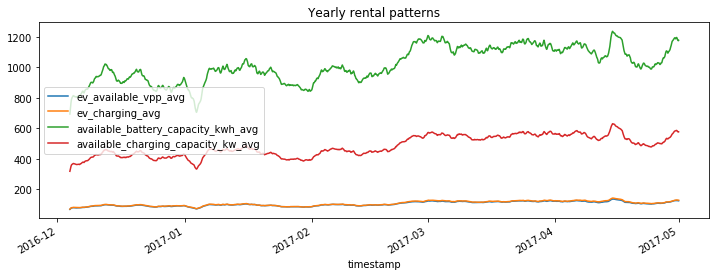

In [8]:
df = apply_smoother(df, days=3)
plot(df, "Yearly rental patterns")

## Weekly Pattern of connected EVS

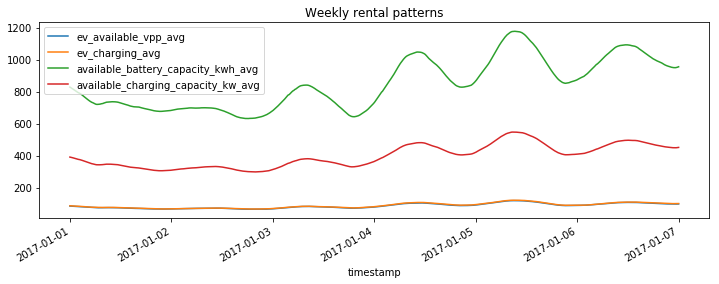

In [9]:
df = apply_smoother(df, days=0.5)
plot(df, "Weekly rental patterns", start=datetime(
    2017, 1, 1), end=datetime(2017, 1, 7))

## Daily Pattern of connected EVS

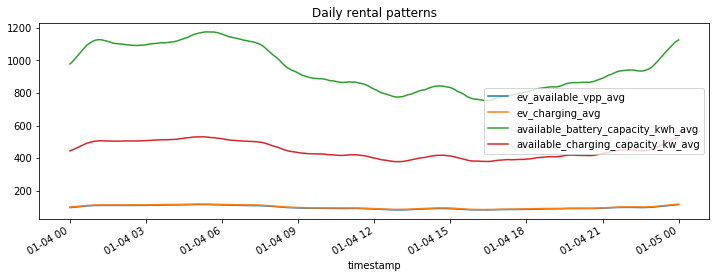

In [10]:
df = apply_smoother(df, days=1/24)
plot(df, "Daily rental patterns", start=datetime(
    2017, 1, 4), end=datetime(2017, 1, 5))